In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
thyroid = pd.read_csv('/content/drive/MyDrive/hypothyroid.csv')
thyroid.head()

thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 3163 non-null   object
 1   Age                        3163 non-null   object
 2   Sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
thyroid.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


## CLEANING DATA


In [ ]:
#Show all rows where _measured = n in thyroid data
thyroid.loc[thyroid['TSH_measured']=='n',['TSH_measured','TSH']]

,TSH_measured,TSH
55,n,?
152,n,?
166,n,?
170,n,?
179,n,?
...,...,...
3124,n,?
3135,n,?
3136,n,?
3150,n,?


In [ ]:
#convert '?' to NULL value in dataset
import numpy as np
thyroid_data = thyroid.replace('?', np.nan)
print(thyroid_data.isnull().sum())

Unnamed: 0                      0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


In [ ]:
#Remove TBG column and TBG_measured
thyroid_data=thyroid_data.drop(['TBG', 'TBG_measured'], axis=1)


In [ ]:
print(thyroid_data.isnull().sum())

Unnamed: 0                     0
Age                          446
Sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64


In [ ]:
#Drop null values only in columns age and Sex
thyroid_data = thyroid_data.dropna(subset=['Age', 'Sex']) #not possible for someone to be age 0

In [ ]:
#replace null values with 0
thyroid_data = thyroid_data.fillna(0)

In [ ]:
# Sex should be a int64 variable
thyroid_data['Sex'] = thyroid_data['Sex'].replace({'F': 0, 'M': 1})

<ipython-input-10-eda763ba7112>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_data['Sex'] = thyroid_data['Sex'].replace({'F': 0, 'M': 1})


In [ ]:
#convert all 'f' to 0 and 't' to 1
thyroid_data= thyroid_data.replace({'f': 0, 't': 1})

<ipython-input-11-a228ca9168de>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_data= thyroid_data.replace({'f': 0, 't': 1})


In [ ]:
#convert all 'y' to 1 and 'n' to 0
thyroid_data= thyroid_data.replace({'y': 1, 'n': 0})

<ipython-input-12-5eba0b966f7e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_data= thyroid_data.replace({'y': 1, 'n': 0})


In [ ]:
#Convert TSH, T3, TT4, T4U, FTI to numerical
thyroid_data['T3'] = thyroid_data['T3'].astype(float)
thyroid_data['TT4'] = thyroid_data['TT4'].astype(float)
thyroid_data['T4U'] = thyroid_data['T4U'].astype(float)
thyroid_data['FTI'] = thyroid_data['FTI'].astype(float)
thyroid_data['TSH'] = thyroid_data['TSH'].astype(float)


In [ ]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2700 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2700 non-null   object 
 1   Age                        2700 non-null   object 
 2   Sex                        2700 non-null   int64  
 3   on_thyroxine               2700 non-null   int64  
 4   query_on_thyroxine         2700 non-null   int64  
 5   on_antithyroid_medication  2700 non-null   int64  
 6   thyroid_surgery            2700 non-null   int64  
 7   query_hypothyroid          2700 non-null   int64  
 8   query_hyperthyroid         2700 non-null   int64  
 9   pregnant                   2700 non-null   int64  
 10  sick                       2700 non-null   int64  
 11  tumor                      2700 non-null   int64  
 12  lithium                    2700 non-null   int64  
 13  goitre                     2700 non-null   int64  
 1

In [ ]:
#how many unique values are there in Unnamed: 0 column
thyroid_data['Unnamed: 0'].value_counts()

,count
Unnamed: 0,
negative,2564
hypothyroid,136


In [ ]:
#Convert Unnamed: 0 column into a int64 by classifying hypothyroid as 1 and negative as 0
thyroid_data['Unnamed: 0'] = thyroid_data['Unnamed: 0'].apply(lambda x: 1 if x == 'hypothyroid' else 0)

In [ ]:
thyroid_data.value_counts('Unnamed: 0')

,count
Unnamed: 0,
0,2564
1,136


In [ ]:
#change 'Unnamed: 0' column to be called 'Hypothyroid'
thyroid_data = thyroid_data.rename(columns={'Unnamed: 0': 'Hypothyroid'})
thyroid_data.columns

Index(['Hypothyroid', 'Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [ ]:
thyroid_data.value_counts('Hypothyroid')

,count
Hypothyroid,
0,2564
1,136


In [ ]:
thyroid_data.head()

,Hypothyroid,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72,1,0,0,0,0,0,0,0,...,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,1,15,0,1,0,0,0,0,0,0,...,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,1,24,1,0,0,0,0,0,0,0,...,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,1,24,0,0,0,0,0,0,0,0,...,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,1,77,1,0,0,0,0,0,0,0,...,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
X = thyroid_data.drop('Hypothyroid', axis=1)
y = thyroid_data['Hypothyroid']

In [ ]:
#resampling the dataset
smote = SMOTE(random_state=None)
X_resampled, y_resampled = smote.fit_resample(X, y)
#split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=None, stratify= y_resampled)

In [ ]:
print(X_train)

            Age  Sex  on_thyroxine  query_on_thyroxine  \
3616  80.035224    0             0                   0   
1295       72.0    1             0                   0   
231        71.0    0             0                   0   
3013  24.320977    0             0                   0   
1085       29.0    0             0                   0   
...         ...  ...           ...                 ...   
770        74.0    0             0                   0   
3555  48.621869    0             0                   0   
3186  70.206874    0             0                   0   
2069       61.0    1             0                   0   
2778  71.020399    0             0                   0   

      on_antithyroid_medication  thyroid_surgery  query_hypothyroid  \
3616                          0                0                  0   
1295                          0                0                  0   
231                           0                0                  1   
3013               

In [ ]:
#how many unique values in y_train
y_train.value_counts()

,count
Hypothyroid,
0,1795
1,1794


In [ ]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [ ]:
#before cross validation
logreg = LogisticRegression(solver='saga', max_iter=5000)
logreg.fit(X_train_scaled, y_train)
y_pred_LR = logreg.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_LR))

0.9707602339181286


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
import numpy as np

metrics = {"accuracy_LR": [], "precision_LR": [], "recall_LR": [], "f1_score_LR": [], "roc_auc_LR": [],"MSE_LR": [], "sensitivity_LR":[],"specificity_LR":[]}
#
# repeat logistic regression 20 times
for i in range(20):
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,stratify=y_resampled, random_state=i)
    y_train= np.array(y_train)

    #scale data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #logistic regression
    logreg = LogisticRegression(solver='saga', max_iter=5000, random_state=i)
    # Cross-validation loop
    fold_metrics = {
        "accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": [], "MSE": [], "sensitivity": [], "specificity": []
    }

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index],y_train[test_index]

        logreg.fit(X_train_fold, y_train_fold)
    #predict
        y_pred_LR = logreg.predict(X_val_fold)
        y_proba_LR = logreg.predict_proba(X_val_fold)[:, 1]
    # Confusion matrix
        cm = confusion_matrix(y_val_fold, y_pred_LR)
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

        fold_metrics["accuracy"].append(accuracy_score(y_val_fold, y_pred_LR))
        fold_metrics["precision"].append(precision_score(y_val_fold, y_pred_LR, zero_division=0))
        fold_metrics["recall"].append(recall_score(y_val_fold, y_pred_LR))
        fold_metrics["f1_score"].append(f1_score(y_val_fold, y_pred_LR))
        fold_metrics["roc_auc"].append(roc_auc_score(y_val_fold, y_proba_LR))
        fold_metrics["MSE"].append(mean_squared_error(y_val_fold, y_pred_LR))
        fold_metrics["sensitivity"].append(sensitivity)
        fold_metrics["specificity"].append(specificity)
    #metrics
    metrics["accuracy_LR"].append(np.mean(fold_metrics["accuracy"]))
    metrics["precision_LR"].append(np.mean(fold_metrics["precision"]))
    metrics["recall_LR"].append(np.mean(fold_metrics["recall"]))
    metrics["f1_score_LR"].append(np.mean(fold_metrics["f1_score"]))
    metrics["roc_auc_LR"].append(np.mean(fold_metrics["roc_auc"]))
    metrics["MSE_LR"].append(np.mean(fold_metrics["MSE"]))
    metrics["sensitivity_LR"].append(np.mean(fold_metrics["sensitivity"]))
    metrics["specificity_LR"].append(np.mean(fold_metrics["specificity"]))

avg_metrics = {metric: np.mean(scores) for metric, scores in metrics.items()}
print(avg_metrics)



{'accuracy_LR': 0.9739191073919107, 'precision_LR': 0.9653314987183172, 'recall_LR': 0.983262398655483, 'f1_score_LR': 0.974168487417395, 'roc_auc_LR': 0.9938788689874107, 'MSE_LR': 0.02608089260808926, 'sensitivity_LR': 0.983262398655483, 'specificity_LR': 0.964586607740309}


In [ ]:
from sklearn.metrics import roc_curve
#average fpr_LR , tpr_LR and threshold_LR for 20 iterations
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_val_fold, y_proba_LR)
roc_auc_LR= roc_auc_score(y_val_fold, y_proba_LR)
print(roc_auc_LR)


0.9946857347380215


## KNN

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def confusion_table(y_pred, y_true):

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    return pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

for K in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=K)
    # Fit the model on the training set
    knn.fit(X_train_scaled, y_train)
    # Predict on the test set
    knn_pred = knn.predict(X_test_scaled)
    # Get the confusion matrix
    C = confusion_table(knn_pred, y_test)
    pred = C.loc[1].sum()  # Total predicted 'Yes' (now represented by 1)
    positive_thyroid = C.loc[1, 1]  # True Positives (correctly predicted 'Yes')
    accuracy = positive_thyroid / pred if pred > 0 else 0  # Avoid division by zero

    # Print the results for each value of K
    templ = (
        "K={0:d}: # Predicted to have hypothyroidism: {1:>2}, "
        "# Correctly predicted hypothyroidism: {2:d}, Accuracy: {3:.1%}"
    )
    print(templ.format(K, pred, positive_thyroid, accuracy))

K=1: # Predicted to have hypothyroidism: 770, # Correctly predicted hypothyroidism: 763, Accuracy: 99.1%
K=2: # Predicted to have hypothyroidism: 770, # Correctly predicted hypothyroidism: 757, Accuracy: 98.3%
K=3: # Predicted to have hypothyroidism: 770, # Correctly predicted hypothyroidism: 763, Accuracy: 99.1%
K=4: # Predicted to have hypothyroidism: 770, # Correctly predicted hypothyroidism: 762, Accuracy: 99.0%
K=5: # Predicted to have hypothyroidism: 770, # Correctly predicted hypothyroidism: 764, Accuracy: 99.2%


In [ ]:
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_scaled, y_train)
y_pred_KNN = knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_KNN))


0.98180636777128


In [ ]:
metrics_knn = {
    "accuracy_KNN": [],
    "precision_KNN": [],
    "recall_KNN": [],
    "f1_score_KNN": [],
    "roc_auc_KNN": [],
    "MSE_KNN": [],
    "sensitivity_KNN":[],"specificity_KNN":[]
}
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# Repeat the process 20 times
for i in range(20):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=i)
    y_train= np.array(y_train)
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    fold_metrics = {
        "accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": [], "MSE": [], "sensitivity": [], "specificity": []
    }

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train
        knn.fit(X_train_fold, y_train_fold)
    # Predict
        y_pred_KNN = knn.predict(X_val_fold)
        y_proba_KNN = knn.predict_proba(X_val_fold)[:, 1]
    #confusion mattrix
        cm = confusion_matrix(y_val_fold, y_pred_KNN)
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    # Collect metrics for the current fold
        fold_metrics["accuracy"].append(accuracy_score(y_val_fold, y_pred_KNN))
        fold_metrics["precision"].append(precision_score(y_val_fold, y_pred_KNN, zero_division=0))
        fold_metrics["recall"].append(recall_score(y_val_fold, y_pred_KNN))
        fold_metrics["f1_score"].append(f1_score(y_val_fold, y_pred_KNN))
        fold_metrics["roc_auc"].append(roc_auc_score(y_val_fold, y_proba_KNN))
        fold_metrics["MSE"].append(mean_squared_error(y_val_fold, y_pred_KNN))
        fold_metrics["sensitivity"].append(sensitivity)
        fold_metrics["specificity"].append(specificity)

    # Metrics
    metrics_knn["accuracy_KNN"].append(np.mean(fold_metrics["accuracy"]))
    metrics_knn["precision_KNN"].append(np.mean(fold_metrics["precision"]))
    metrics_knn["recall_KNN"].append(np.mean(fold_metrics["recall"]))
    metrics_knn["f1_score_KNN"].append(np.mean(fold_metrics["f1_score"]))
    metrics_knn["roc_auc_KNN"].append(np.mean(fold_metrics["roc_auc"]))
    metrics_knn["MSE_KNN"].append(np.mean(fold_metrics["MSE"]))
    metrics_knn["sensitivity_KNN"].append(np.mean(fold_metrics["sensitivity"]))
    metrics_knn["specificity_KNN"].append(np.mean(fold_metrics["specificity"]))


# Calculate average metrics
avg_metrics_knn = {metric: np.mean(scores) for metric, scores in metrics_knn.items()}
print(avg_metrics_knn)


{'accuracy_KNN': 0.9763168844185965, 'precision_KNN': 0.9684041715419258, 'recall_KNN': 0.9848424394267129, 'f1_score_KNN': 0.9765239138163644, 'roc_auc_KNN': 0.9873112827566584, 'MSE_KNN': 0.02368311558140348, 'sensitivity_KNN': 0.9848424394267129, 'specificity_KNN': 0.9677921289740278}


In [ ]:
#average fpr_KNN , tpr_KNN and threshold_KNN for 20 iterations
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_val_fold, y_proba_KNN)
roc_auc_KNN = roc_auc_score(y_val_fold, y_proba_KNN)
print(roc_auc_KNN)


0.9821159023357868


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
tree= DTC(criterion='entropy', max_depth=4, random_state= None)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
accuracy_score(y_test, tree.predict(X_test_scaled))

0.9831059129304743

In [ ]:
from sklearn.metrics import log_loss
resid_dev= np.sum(log_loss(y_test, tree.predict_proba(X_test_scaled)))
print(resid_dev)

0.03150786071783802


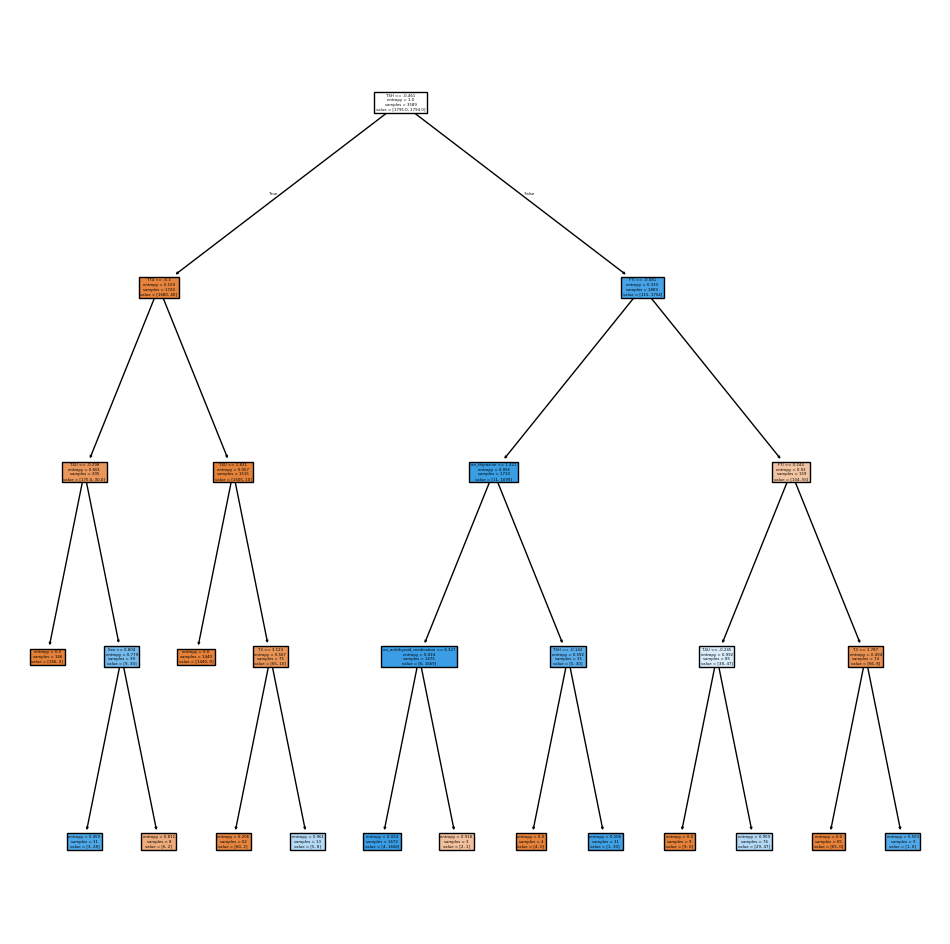

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree, ax=ax, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
tree2= DTC(criterion='entropy', max_depth=4,random_state=0)
tree2.fit(X_train_scaled, y_train)
accuracy_score(y_test, tree2.predict(X_test_scaled))

0.9831059129304743

In [ ]:
from sklearn.model_selection import KFold
ccp_path= tree2.cost_complexity_pruning_path(X_train_scaled, y_train)
kfold= KFold(10, random_state=1, shuffle= True)


In [ ]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(tree2, {'ccp_alpha': ccp_path['ccp_alphas']},
                  cv=kfold, scoring='accuracy',
                  refit=True)
grid.fit(X_train_scaled, y_train)
grid.best_score_

0.9768732201490795

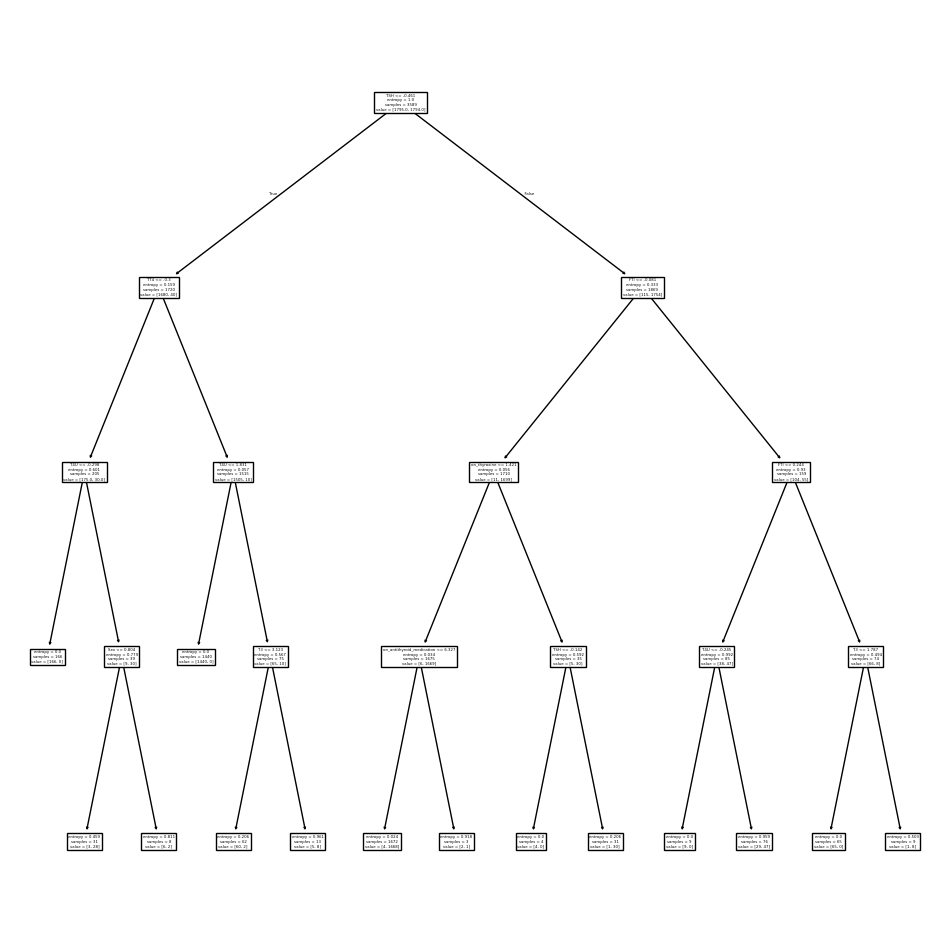

In [ ]:
ax2= plt.subplots(figsize=(12, 12))[1]
best_tree = grid.best_estimator_
plot_tree(best_tree, feature_names=X.columns, ax=ax2)
plt.show()

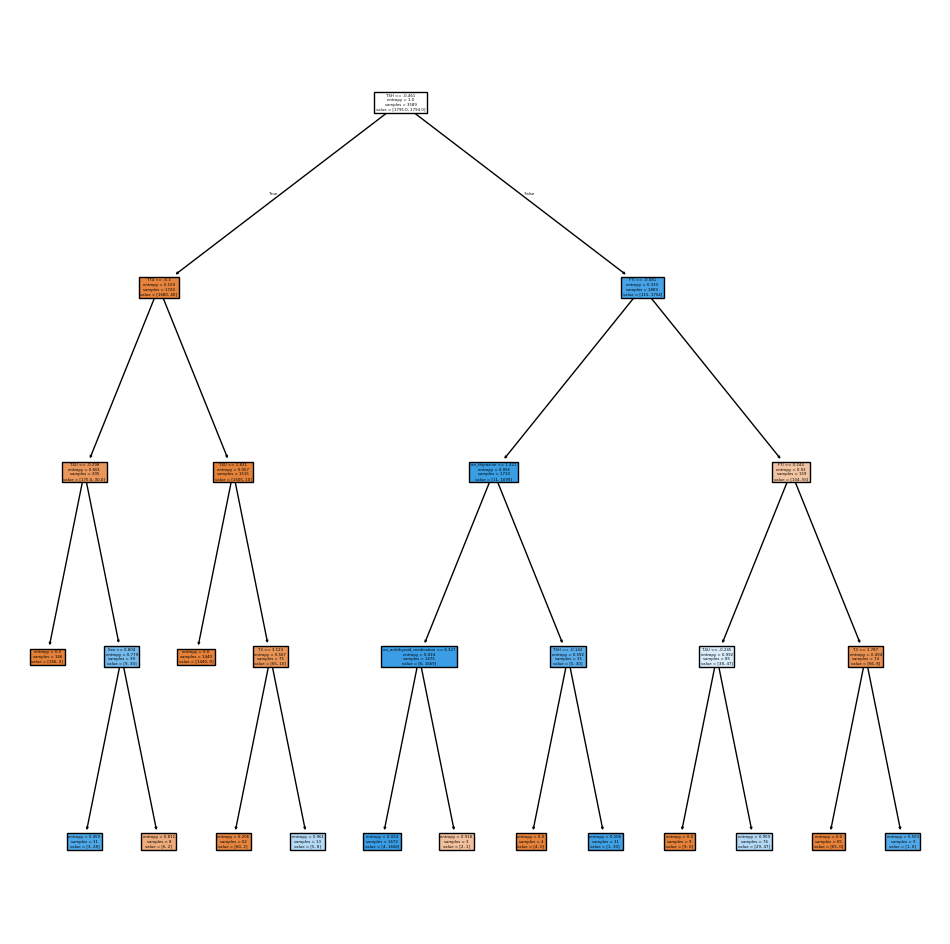

In [ ]:
fig, ax= plt.subplots(figsize=(12, 12))
plot_tree(tree2, ax=ax, feature_names=X.columns, filled = True)
plt.show()

In [ ]:
resid_dev2= np.sum(log_loss(y_test, best_tree.predict_proba(X_test_scaled)))
print(resid_dev2)

0.03150786071783802


In [ ]:
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_tree))

0.9831059129304743


In [ ]:
#Do model tree 20 times
metrics_tree = {
    "accuracy_tree": [],
    "precision_tree": [],
    "recall_tree": [],
    "f1_score_tree": [],
    "roc_auc_tree": [],
    "MSE_tree": [],
    "sensitivity_tree":[],"specificity_tree":[]
}
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=i)
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train= np.array(y_train)

    fold_metrics = {
        "accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": [], "MSE": [], "sensitivity": [], "specificity": []
    }

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
        # Train
        tree.fit(X_train_fold, y_train_fold)
    # Predict
        y_pred_tree = tree.predict(X_val_fold)
        y_proba_tree = tree.predict_proba(X_val_fold)[:, 1]
    # confusion matrix
        cm = confusion_matrix(y_val_fold, y_pred_tree)
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
         # Collect metrics for the current fold
        fold_metrics["accuracy"].append(accuracy_score(y_val_fold, y_pred_tree))
        fold_metrics["precision"].append(precision_score(y_val_fold, y_pred_tree, zero_division=0))
        fold_metrics["recall"].append(recall_score(y_val_fold, y_pred_tree))
        fold_metrics["f1_score"].append(f1_score(y_val_fold, y_pred_tree))
        fold_metrics["roc_auc"].append(roc_auc_score(y_val_fold, y_proba_tree))
        fold_metrics["MSE"].append(mean_squared_error(y_val_fold, y_pred_tree))
        fold_metrics["sensitivity"].append(sensitivity)
        fold_metrics["specificity"].append(specificity)


    metrics_tree["accuracy_tree"].append(np.mean(fold_metrics["accuracy"]))
    metrics_tree["precision_tree"].append(np.mean(fold_metrics["precision"]))
    metrics_tree["recall_tree"].append(np.mean(fold_metrics["recall"]))
    metrics_tree["f1_score_tree"].append(np.mean(fold_metrics["f1_score"]))
    metrics_tree["roc_auc_tree"].append(np.mean(fold_metrics["roc_auc"]))
    metrics_tree["MSE_tree"].append(np.mean(fold_metrics["MSE"]))
    metrics_tree["sensitivity_tree"].append(np.mean(fold_metrics["sensitivity"]))
    metrics_tree["specificity_tree"].append(np.mean(fold_metrics["specificity"]))

# Calculate average metrics
avg_metrics_tree = {metric: np.mean(scores) for metric, scores in metrics_tree.items()}
print(avg_metrics_tree)

{'accuracy_tree': 0.9805237118448501, 'precision_tree': 0.976919979384858, 'recall_tree': 0.9844509889357462, 'f1_score_tree': 0.980595468619111, 'roc_auc_tree': 0.9931841200008723, 'MSE_tree': 0.019476288155149707, 'sensitivity_tree': 0.9844509889357462, 'specificity_tree': 0.9765966916169994}


In [ ]:
#average fpr_tree , tpr_tree and threshold_tree for 20 iterations
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_val_fold, y_proba_tree)
roc_auc_tree = roc_auc_score(y_val_fold, y_proba_tree)
print(roc_auc_tree)

0.9899472463858328


## Naive Bayes

In [ ]:
#X does not need to be scaled, Naive Bayes already assumes features are normally distributed

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing': np.logspace(-12, -7, 6)}
grid_search = GridSearchCV(GaussianNB(), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_resampled, y_resampled)
best_smoothing = grid_search.best_params_['var_smoothing']
nb = GaussianNB(var_smoothing=best_smoothing)

In [ ]:
nb = GaussianNB(var_smoothing=best_smoothing)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))

0.7355425601039636


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define metrics dictionary
metrics_nb = {
    "accuracy_nb": [],
    "precision_nb": [],
    "recall_nb": [],
    "f1_score_nb": [],
    "roc_auc_nb": [],
    "MSE_nb": [],
    "sensitivity_nb": [],
    "specificity_nb": []
}

# Initialize Naive Bayes model
nb = GaussianNB(var_smoothing=best_smoothing)
scaler = StandardScaler()

# Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Repeat 20 times
for i in range(20):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=i)
    y_train = np.array(y_train)

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    fold_metrics = {
        "accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": [], "MSE": [], "sensitivity": [], "specificity": []
    }

    # Cross-validation loop
    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        # Train Naive Bayes
        nb.fit(X_train_fold, y_train_fold)
        y_pred_nb = nb.predict(X_val_fold)
        y_proba_nb = nb.predict_proba(X_val_fold)[:, 1]

        # Confusion matrix
        cm = confusion_matrix(y_val_fold, y_pred_nb)
        if cm.shape == (2, 2):  # Only proceed if it's a 2x2 matrix
            TN, FP, FN, TP = cm.ravel()
            sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        else:
            TN, FP, FN, TP = 0, 0, 0, 0  # Handle cases where the model doesn't predict both classes
            sensitivity = 0
            specificity = 0

        # Collect fold metrics
        fold_metrics["accuracy"].append(accuracy_score(y_val_fold, y_pred_nb))
        fold_metrics["precision"].append(precision_score(y_val_fold, y_pred_nb, zero_division=0))
        fold_metrics["recall"].append(recall_score(y_val_fold, y_pred_nb))
        fold_metrics["f1_score"].append(f1_score(y_val_fold, y_pred_nb))
        fold_metrics["roc_auc"].append(roc_auc_score(y_val_fold, y_proba_nb))
        fold_metrics["MSE"].append(mean_squared_error(y_val_fold, y_pred_nb))
        fold_metrics["sensitivity"].append(sensitivity)
        fold_metrics["specificity"].append(specificity)

    # Collect average metrics across folds
    metrics_nb["accuracy_nb"].append(np.mean(fold_metrics["accuracy"]))
    metrics_nb["precision_nb"].append(np.mean(fold_metrics["precision"]))
    metrics_nb["recall_nb"].append(np.mean(fold_metrics["recall"]))
    metrics_nb["f1_score_nb"].append(np.mean(fold_metrics["f1_score"]))
    metrics_nb["roc_auc_nb"].append(np.mean(fold_metrics["roc_auc"]))
    metrics_nb["MSE_nb"].append(np.mean(fold_metrics["MSE"]))
    metrics_nb["sensitivity_nb"].append(np.mean(fold_metrics["sensitivity"]))
    metrics_nb["specificity_nb"].append(np.mean(fold_metrics["specificity"]))

# Calculate and print the average metrics across 20 iterations
avg_metrics_nb = {metric: np.mean(scores) for metric, scores in metrics_nb.items()}
print(avg_metrics_nb)

{'accuracy_nb': 0.6434065238703542, 'precision_nb': 0.5845163935851356, 'recall_nb': 0.9936619191739364, 'f1_score_nb': 0.7359961965535531, 'roc_auc_nb': 0.732105194886024, 'MSE_nb': 0.3565934761296456, 'sensitivity_nb': 0.9936619191739364, 'specificity_nb': 0.2931545902320337}


In [ ]:
#average fpr_nb , tpr_nb and threshold_nb for 20 iterations
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_val_fold, y_proba_nb)
roc_auc_nb = roc_auc_score(y_val_fold, y_proba_nb)
print(roc_auc_nb)

0.7380011897679952


## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_lda))

0.958414554905783


In [ ]:
#do the same for LDA
metrics_lda = {
    "accuracy_lda": [],
    "precision_lda": [],
    "recall_lda": [],
    "f1_score_lda": [],
    "roc_auc_lda": [],
    "MSE_lda": [],
    "sensitivity_lda":[],"specificity_lda":[]
}
lda = LinearDiscriminantAnalysis()
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=i)
    y_train= np.array(y_train)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    fold_metrics = {
        "accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": [], "MSE": [], "sensitivity": [], "specificity": []
    }

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        lda.fit(X_train_fold, y_train_fold)
        y_pred_lda = lda.predict(X_val_fold)
        y_proba_lda = lda.predict_proba(X_val_fold)[:,1]
        cm = confusion_matrix(y_val_fold, y_pred_lda)
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        # Collect metrics for the current fold
        fold_metrics["accuracy"].append(accuracy_score(y_val_fold, y_pred_lda))
        fold_metrics["precision"].append(precision_score(y_val_fold, y_pred_lda, zero_division=0))
        fold_metrics["recall"].append(recall_score(y_val_fold, y_pred_lda))
        fold_metrics["f1_score"].append(f1_score(y_val_fold, y_pred_lda))
        fold_metrics["roc_auc"].append(roc_auc_score(y_val_fold, y_proba_lda))
        fold_metrics["MSE"].append(mean_squared_error(y_val_fold, y_pred_lda))
        fold_metrics["sensitivity"].append(sensitivity)
        fold_metrics["specificity"].append(specificity)

    metrics_lda["accuracy_lda"].append(np.mean(fold_metrics["accuracy"]))
    metrics_lda["precision_lda"].append(np.mean(fold_metrics["precision"]))
    metrics_lda["recall_lda"].append(np.mean(fold_metrics["recall"]))
    metrics_lda["f1_score_lda"].append(np.mean(fold_metrics["f1_score"]))
    metrics_lda["roc_auc_lda"].append(np.mean(fold_metrics["roc_auc"]))
    metrics_lda["MSE_lda"].append(np.mean(fold_metrics["MSE"]))
    metrics_lda["sensitivity_lda"].append(np.mean(fold_metrics["sensitivity"]))
    metrics_lda["specificity_lda"].append(np.mean(fold_metrics["specificity"]))

avg_metrics_lda = {metric: np.mean(scores) for metric, scores in metrics_lda.items()}
print(avg_metrics_lda)


{'accuracy_lda': 0.9551686266282833, 'precision_lda': 0.9368413146270351, 'recall_lda': 0.9762895846625479, 'f1_score_lda': 0.9561108372507732, 'roc_auc_lda': 0.991713127466466, 'MSE_lda': 0.04483137337171673, 'sensitivity_lda': 0.9762895846625479, 'specificity_lda': 0.934050590560371}


In [ ]:
#average fpr_lda , tpr_lda and threshold_lda for 20 iterations
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_val_fold, y_proba_lda)
roc_auc_lda = roc_auc_score(y_val_fold, y_proba_lda)
print(roc_auc_lda)

0.9949425001167115


## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_svm))

0.9746588693957114


In [ ]:
#Same for Support Vector Machines

metrics_svm = {
    "accuracy_svm": [],
    "precision_svm": [],
    "recall_svm": [],
    "f1_score_svm": [],
    "roc_auc_svm": [],
    "MSE_svm": [],
    "sensitivity_svm":[],"specificity_svm":[]
}
svm = SVC(kernel='linear', probability=True)
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=i)
    y_train= np.array(y_train)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    fold_metrics = {
        "accuracy": [], "precision": [], "recall": [], "f1_score": [], "roc_auc": [], "MSE": [], "sensitivity": [], "specificity": []
    }

    for train_index, test_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        svm.fit(X_train_fold, y_train_fold)
        y_pred_svm = svm.predict(X_val_fold)
        y_proba_svm = svm.predict_proba(X_val_fold)[:,1]
        cm = confusion_matrix(y_val_fold, y_pred_svm)
        TN, FP, FN, TP = cm.ravel()
        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

        fold_metrics["accuracy"].append(accuracy_score(y_val_fold, y_pred_svm))
        fold_metrics["precision"].append(precision_score(y_val_fold, y_pred_svm, zero_division=0))
        fold_metrics["recall"].append(recall_score(y_val_fold, y_pred_svm))
        fold_metrics["f1_score"].append(f1_score(y_val_fold, y_pred_svm))
        fold_metrics["roc_auc"].append(roc_auc_score(y_val_fold, y_proba_svm))
        fold_metrics["MSE"].append(mean_squared_error(y_val_fold, y_pred_svm))
        fold_metrics["sensitivity"].append(sensitivity)
        fold_metrics["specificity"].append(specificity)

      # Append the average metrics of the current run to the overall metrics
    metrics_svm["accuracy_svm"].append(np.mean(fold_metrics["accuracy"]))
    metrics_svm["precision_svm"].append(np.mean(fold_metrics["precision"]))
    metrics_svm["recall_svm"].append(np.mean(fold_metrics["recall"]))
    metrics_svm["f1_score_svm"].append(np.mean(fold_metrics["f1_score"]))
    metrics_svm["roc_auc_svm"].append(np.mean(fold_metrics["roc_auc"]))
    metrics_svm["MSE_svm"].append(np.mean(fold_metrics["MSE"]))
    metrics_svm["sensitivity_svm"].append(np.mean(fold_metrics["sensitivity"]))
    metrics_svm["specificity_svm"].append(np.mean(fold_metrics["specificity"]))
avg_metrics_svm = {metric: np.mean(scores) for metric, scores in metrics_svm.items()}
print(avg_metrics_svm)


{'accuracy_svm': 0.9738361829504706, 'precision_svm': 0.9666179318777435, 'recall_svm': 0.9816665629230792, 'f1_score_svm': 0.9740420869892521, 'roc_auc_svm': 0.9937605335682967, 'MSE_svm': 0.026163817049529338, 'sensitivity_svm': 0.9816665629230792, 'specificity_svm': 0.9660065202844648}


In [ ]:
#average fpr_svm , tpr_svm and threshold_svm for 20 iterations
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_val_fold, y_proba_svm)
roc_auc_svm = roc_auc_score(y_val_fold, y_proba_svm)
print(roc_auc_svm)

0.9876246868240457


## Compare all models


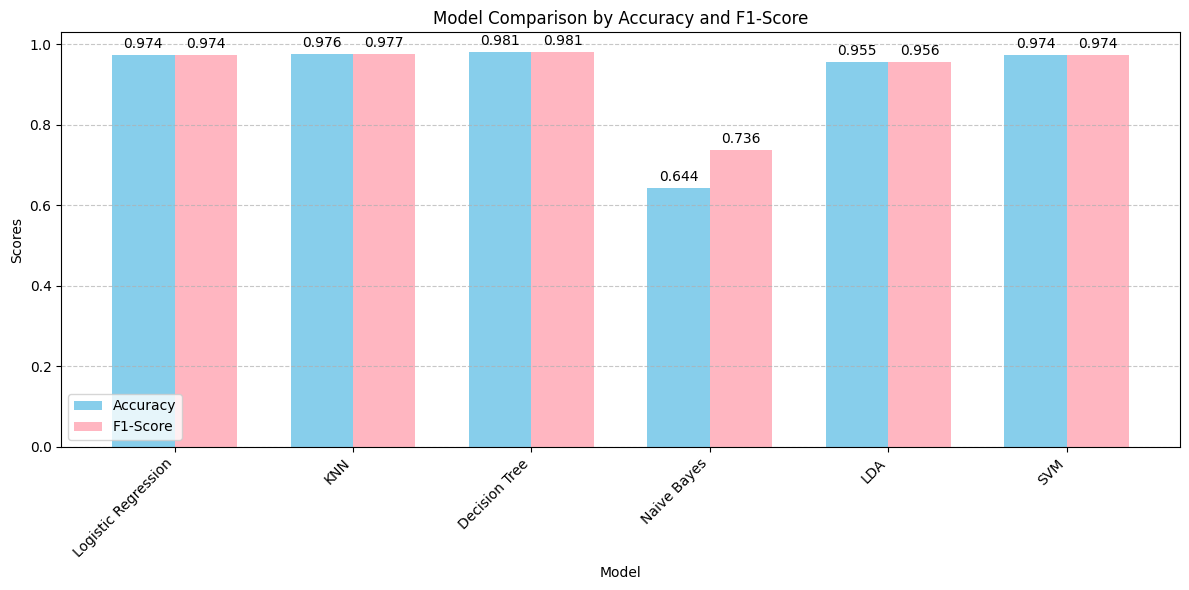

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'LDA', 'SVM']
accuracy = [avg_metrics['accuracy_LR'], avg_metrics_knn['accuracy_KNN'], avg_metrics_tree['accuracy_tree'],
            avg_metrics_nb['accuracy_nb'], avg_metrics_lda['accuracy_lda'], avg_metrics_svm['accuracy_svm']]
f1_scores = [avg_metrics['f1_score_LR'], avg_metrics_knn['f1_score_KNN'], avg_metrics_tree['f1_score_tree'],
             avg_metrics_nb['f1_score_nb'], avg_metrics_lda['f1_score_lda'], avg_metrics_svm['f1_score_svm']]
colors_accuracy = 'skyblue'
colors_f1 = 'lightpink'
bar_width = 0.35
index = np.arange(len(models))
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy, bar_width, color=colors_accuracy, label='Accuracy')
plt.bar(index + bar_width, f1_scores, bar_width, color=colors_f1, label='F1-Score')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Comparison by Accuracy and F1-Score')
plt.xticks(index + bar_width / 2, models, rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(len(models)):
    plt.text(i, accuracy[i] + 0.01, str(round(accuracy[i], 3)), ha='center', va='bottom')
    plt.text(i + bar_width, f1_scores[i] + 0.01, str(round(f1_scores[i], 3)), ha='center', va='bottom')
plt.legend(loc="lower left")
plt.show()


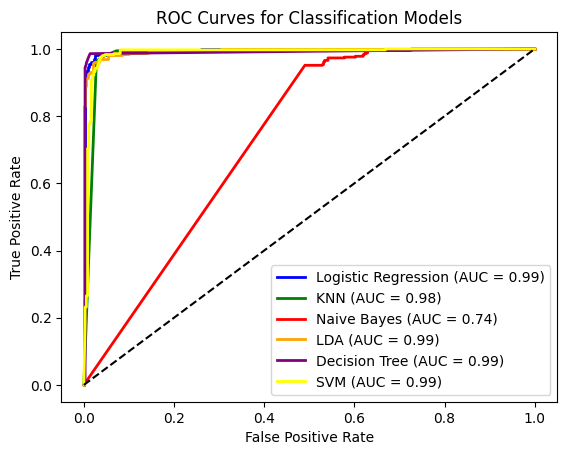

In [ ]:
#use avg_tpr_model , avg_fpr_model and avg_threshold_model to create a ROC curve
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_LR:.2f})')
plt.plot(fpr_KNN, tpr_KNN, color='green', lw=2, label=f'KNN (AUC = {roc_auc_KNN:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lda, tpr_lda, color='orange', lw=2, label=f'LDA (AUC = {roc_auc_lda:.2f})')
plt.plot(fpr_tree, tpr_tree, color='purple', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_svm, tpr_svm, color='yellow', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curves for Classification Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


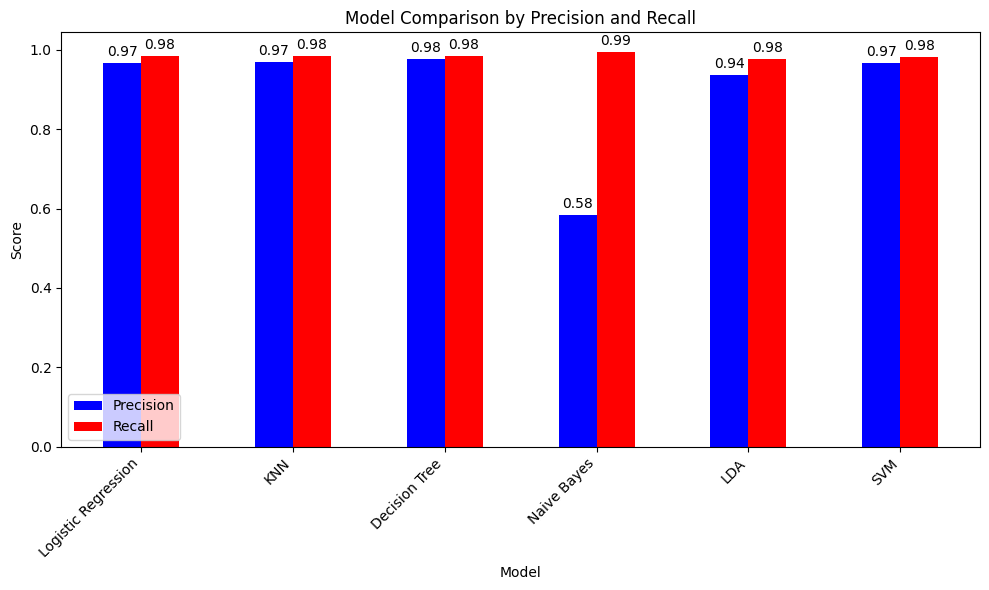

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

precision = [avg_metrics['precision_LR'], avg_metrics_knn['precision_KNN'], avg_metrics_tree['precision_tree'], avg_metrics_nb['precision_nb'], avg_metrics_lda['precision_lda'], avg_metrics_svm['precision_svm']]
recall = [avg_metrics['recall_LR'], avg_metrics_knn['recall_KNN'], avg_metrics_tree['recall_tree'], avg_metrics_nb['recall_nb'], avg_metrics_lda['recall_lda'], avg_metrics_svm['recall_svm']]
barWidth = 0.25
r1 = np.arange(len(models))

plt.figure(figsize=(10, 6))

# Assign the result of plt.bar to precision_bars and recall_bars for later use
precision_bars = plt.bar(r1, precision, barWidth, label='Precision', color='Blue') # Assign the result to precision_bars
recall_bars = plt.bar(r1 + barWidth, recall, barWidth, label='Recall', color='Red')   # Assign the result to recall_bars


plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison by Precision and Recall')
plt.xticks(r1 + barWidth/2, models, rotation=45, ha='right')
plt.legend(loc='lower left')

# Add text labels above the bars for Precision
for bar in precision_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)
# Add text labels above the bars for Recall
for bar in recall_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

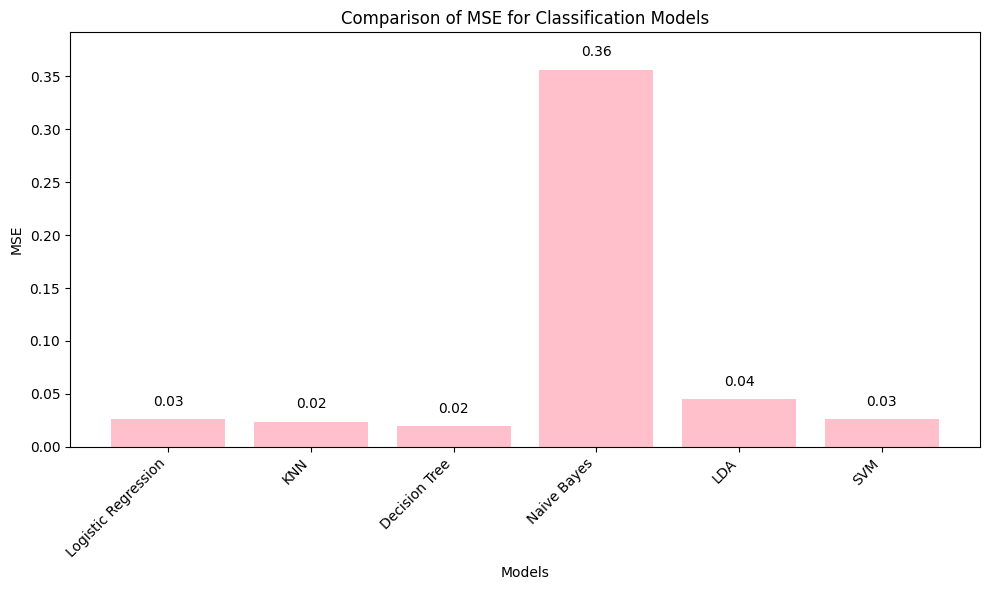

In [ ]:
mse_scores = [avg_metrics['MSE_LR'], avg_metrics_knn['MSE_KNN'], avg_metrics_tree['MSE_tree'],
              avg_metrics_nb['MSE_nb'], avg_metrics_lda['MSE_lda'], avg_metrics_svm['MSE_svm']]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_scores, color='pink')
plt.ylim(0, max(mse_scores) + 0.1 * max(mse_scores))
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Classification Models')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.tight_layout()
plt.show()

